In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
import pandas as pd
from profanity_check import predict, predict_prob
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [32]:
songs = pd.read_csv('../data/songs_after_round_2_cleaning.csv')

In [33]:
songs.shape

(1980, 15)

# Making Column Flag for Profainity in Song

In [34]:
songs['profain'] = predict(songs['cleaned_lyrics'])

# Making Column for Profain Probabilty (Probability the Lyrics are Profain)

In [35]:
songs['profain_prob'] = predict_prob(songs['cleaned_lyrics'])

# Average Profain Probability by Artist

In [36]:
songs.groupby('artist')['profain_prob'].mean().reset_index().sort_values(by = 'profain_prob').head(10)

,artist,profain_prob
40,Hillsong Worship,0.005372
86,MorMor,0.033113
111,Surfaces,0.056970
18,Chris Stapleton,0.066442
61,Lauren Daigle,0.097165
63,Lewis Capaldi,0.139189
12,Caamp,0.165262
50,Jonas Brothers,0.177941
84,Miranda Lambert,0.178034
31,Fleetwood Mac,0.202240


In [37]:
songs.groupby('artist')['profain_prob'].mean().reset_index().sort_values(by = 'profain_prob').tail(10)

,artist,profain_prob
69,Lil Tjay,0.999996
66,Lil Mosey,0.999999
68,Lil Tecca,1.000000
65,Lil Durk,1.000000
97,Polo G,1.000000
73,Logic,1.000000
85,Moneybagg Yo,1.000000
21,DaBaby,1.000000
89,NLE Choppa,1.000000
82,Megan Thee Stallion,1.000000


# Average Profain Probability by Gender

In [38]:
songs.groupby('gender')['profain_prob'].mean().reset_index().sort_values(by = 'profain_prob')

,gender,profain_prob
2,Non Binary,0.440535
0,Female,0.551223
1,Male,0.688358


# Average Profain Probability by Artist Age

In [39]:
songs.groupby('birth_decade')['profain_prob'].mean().reset_index().sort_values(by = 'profain_prob')

,birth_decade,profain_prob
0,1960s,0.204495
1,1970s,0.444183
2,1980s,0.586238
3,1990s,0.683494
4,2000s,0.728526


In [40]:
songs.groupby('birth_5_yr')['profain_prob'].mean().reset_index().sort_values(by = 'profain_prob')

,birth_5_yr,profain_prob
0,1960-1964,0.202240
1,1965-1969,0.206749
3,1975-1979,0.351573
4,1980-1984,0.432328
6,1990-1994,0.616803
5,1985-1989,0.669971
8,2000-2004,0.728526
7,1995-1999,0.770550
2,1970-1974,0.999839


In [41]:
songs.groupby(['birth_5_yr','artist'])['song_name'].count()

birth_5_yr  artist                    
1960-1964   Fleetwood Mac                 15
1965-1969   Kenny Chesney                 15
1970-1974   Eminem                        15
1975-1979   Blake Shelton                 15
            Chris Stapleton               15
            Jason Aldean                  15
            John Legend                   15
            Lee Brice                     15
            Luke Bryan                    15
1980-1984   Carrie Underwood              15
            Future                        15
            Hillsong Worship              15
            Katy Perry                    15
            Miranda Lambert               15
            Nicki Minaj                   15
            Sam Hunt                      15
1985-1989   Bruno Mars                    15
            Chris Brown                   15
            Drake                         15
            Frank Ocean                   15
            James Arthur                  15
            Jaso

In [42]:
songs.head()

,song_name,artist,lyrics,descriptionsong,accepted_annotations,contributors,pageviews,descriptionartist,images_url,followers_count,gender,birth_year,birth_decade,birth_5_yr,cleaned_lyrics,profain,profain_prob
0,​​rockstar,Post Malone,"[Intro: Post Malone] Hahahahaha Tank God Ayy, ...","On “rockstar,” Post Malone compares his habits...",18.0,440.0,6884752.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4616.0,Male,1995.0,1990s,1995-1999,[intro: post malone] hahahahaha tank god ayy a...,1,1.000000
1,White Iverson,Post Malone,[Intro] Double OT I'm a new three [Chorus] Sau...,"Virtually unknown before this track, Post Malo...",31.0,222.0,4145011.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4616.0,Male,1995.0,1990s,1995-1999,[intro] double ot im a new three [chorus] sauc...,1,1.000000
2,Congratulations,Post Malone,"[Intro: Post Malone] Mm-mmm Yeah, yeah Mm-mmm ...","On “Congratulations,“ Post Malone and Quavo ce...",13.0,222.0,3634846.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4616.0,Male,1995.0,1990s,1995-1999,[intro: post malone] mm_mmm mm_mmm yeah (hey) ...,1,0.998367
3,Psycho,Post Malone,"[Chorus: Post Malone] Damn, my AP goin' psycho...",“Psycho” is the third single from Post Malone’...,21.0,230.0,3082328.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4616.0,Male,1995.0,1990s,1995-1999,[chorus: post malone] damn my ap going psycho ...,1,1.000000
4,I Fall Apart,Post Malone,"[Intro] Ooh, I fall apart Ooh, yeah, mmm, yeah...","On “I Fall Apart,” Post reminisces about a hea...",7.0,126.0,2640796.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4616.0,Male,1995.0,1990s,1995-1999,[intro] ooh i fall apart ooh yeah mmm yeah [v...,0,0.202692


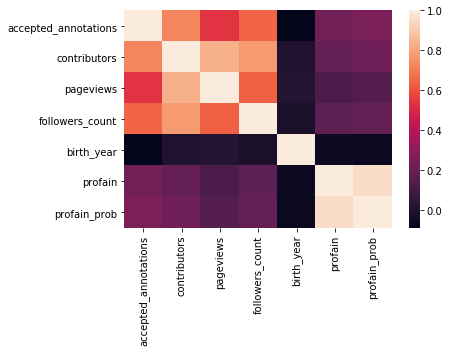

In [43]:
sns.heatmap(songs.corr());